# Introduction

`plotnine` is a data visualization library which implements the **grammar of graphics**. The grammar of graphics is an approach to data visualization API design which diverges in the extreme from that followed by the libraries we have seen so far.

The data visualization design process starts with creating a figure (1), adjusting the geometry of that figure (2), then adjusting the aesthetic of that figure (3). As we saw in the section on styling your plots, this makes things harder than they need to be (when can I use a parameter? When do I need a method?), and creates a well-known user pain point.

The grammar of graphics solves this thorny issue. In grammar of graphics -based libraries (like `plotnine`), *every* operation is expressed the same way: using a function. In `plotnine` we create graphs by "adding up" our elements:

![](https://i.imgur.com/UoIbtqI.png)

The **Data** element is a call to `ggplot`, which populates the data in the graph. The **Aesthetics** are controlled by the `aes` function, which populates our visual variables: colors, shapes, and so on. Finally, **Layers** are functions that add to or modify the plot itself.

A `plotnine` plot consists of functions of these three types concatenated together with a plus (`+`) operator. The result is an extremely expressive way of building your charts!

Let's jump into `plotnine` and see this grammar of graphics in action.

In [ ]:
import pandas as pd
reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
reviews.head(3)

In [ ]:
from plotnine import *

In [ ]:
top_wines = reviews[reviews['variety'].isin(reviews['variety'].value_counts().head(5).index)]

## The grammar of graphics

Our starting point is a simple scatter plot:

In [ ]:
df = top_wines.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point())

Notice how the plot breaks down smoothly into three separate operations. First we initialize the plot with `ggplot`, passing in our input data (`df`) as a parameter (the **data**). Then we add the variables of interest in `aes` (the **aesthetic**). Finally we specify the plot type (the **layer**): `geom_point`.

To keep changing the plot, just keep adding things. You can add a regression line with a `stat_smooth` layer:

In [ ]:
df = top_wines.head(1000).dropna()

(
    ggplot(df)
        + aes('points', 'price')
        + geom_point()
        + stat_smooth()
)

To add color, add an `aes` with `color`:

In [ ]:
df = top_wines.head(1000).dropna()

(
    ggplot(df)
        + geom_point()
        + aes(color='points')
        + aes('points', 'price')
        + stat_smooth()
)

To apply faceting, use `facet_wrap`.

In [ ]:
df = top_wines.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)

Notice how every mutation of the plot requires adding one more thing, and how that one thing goes to the same place every time (we just add it on). With a little bit of knowledge about what the valid functions in `plotnine` are, every change we need to make is *obvious*. And this sense of "obviousness" is what the library is all about!

Faceting is a really good example of this in action. Using `plotnine`, once we realize we need faceting we can add it in right away&mdash;just append a `facet_wrap` to the end. Using `seaborn`, we would have to change our whole approach: we need to compute a properly parameterized `FacetGrid`, insert that *before* our plotting code, and (potentially) rewrite our plotting function so that it "fits" inside of `FacetGrid`.

Moverover, modifying your output is as simple as adding one more method to the chain. Since each modification we make is independent, we can make those changes anywhere.

For example, in all of the plots thus far we have had the chart aesthetic (`aes`) appear as a separate functional element; however, `aes` can also appear as a *layer* parameter:

In [ ]:
(ggplot(df)
 + geom_point(aes('points', 'price'))
)

Or as a parameter in the overall *data*:

In [ ]:
(ggplot(df, aes('points', 'price'))
 + geom_point()
)

Notice how these plots are all strictly equivalent!

## More plotnine

`plotnine` is actually a faithful Python port of the now-very-famous originator of the grammar-of-graphics concept, the `ggplot2` library, an R package published by celebrity programmer Hadley Wickham. The (for Python, unusual) use of the `+` operator mimics its usage in `ggplot2`.

Geometries are the core of `plotnine`, which comes with a variety of geometries of varying levels of complexity. For example, a `poltnine` bar plot is `geom_bar`:

In [ ]:
(ggplot(top_wines)
     + aes('points')
     + geom_bar()
)

The `plotnine` equivalent of a hexplot, a two-dimensional histogram, is `geom_bin2d`:

In [ ]:
(ggplot(top_wines)
     + aes('points', 'variety')
     + geom_bin2d(bins=20)
)

Non-geometric function calls can be mixed in to change the structure of the plot. We've already seen `facet_wrap`; `coord_fixed` and `ggtitle` are two more.

In [ ]:
(ggplot(top_wines)
         + aes('points', 'variety')
         + geom_bin2d(bins=20)
         + coord_fixed(ratio=1)
         + ggtitle("Top Five Most Common Wine Variety Points Awarded")
)

And so on.

For a list of functions provided by `plotnine`, see the library's well-stocked [API Reference](https://plotnine.readthedocs.io/en/stable/api.html).

# Exercises

For the following exercises, try forking and running this notebook, and then reproducing the charts that follows.

In [2]:
import pandas as pd

pokemon = pd.read_csv("../input/pokemon/Pokemon.csv", index_col=0)\
                        .rename(columns=lambda x: x.replace(" ", "_"))
pokemon.head(3)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


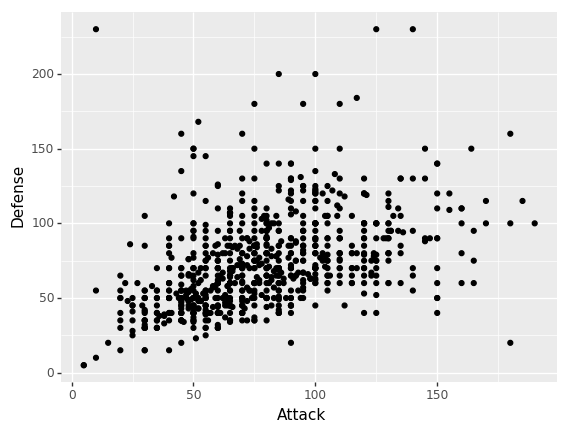

<ggplot: (8737144134541)>

In [5]:
from plotnine import *
(
    ggplot(pokemon, aes('Attack', 'Defense'))
        + geom_point()
)

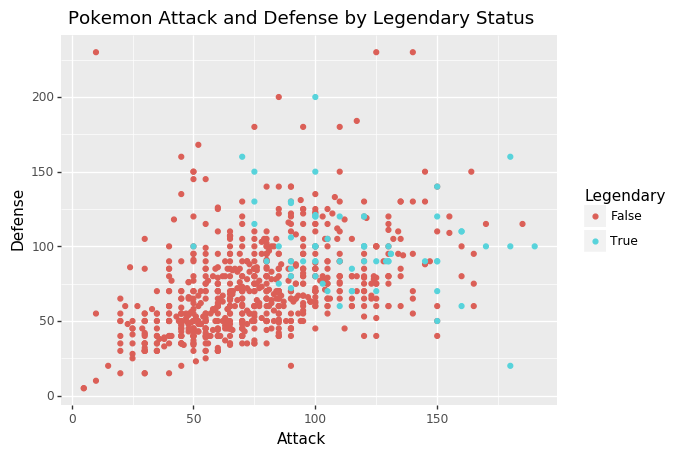

<ggplot: (8737233727706)>

In [6]:
(
    ggplot(pokemon, aes('Attack', 'Defense', color='Legendary'))
        + geom_point()
        + ggtitle("Pokemon Attack and Defense by Legendary Status")
)

Hint: for the plot that follows, use `geom_histogram`.

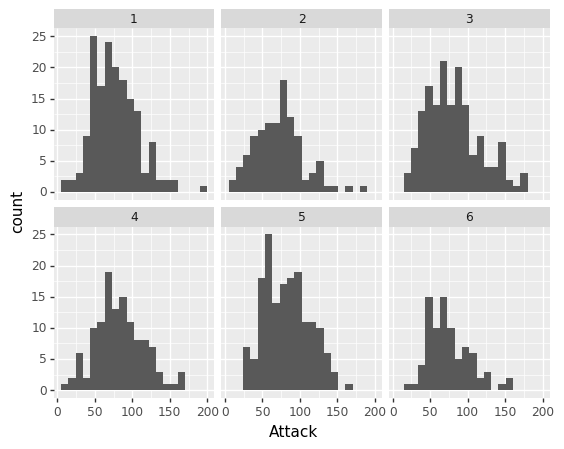

<ggplot: (8737233704547)>

In [7]:
(
    ggplot(pokemon, aes('Attack'))
        + geom_histogram(bins=20)
) + facet_wrap('~Generation')

# Conclusion

`plotnine` is a data visualization library which implements the grammar of graphics, an ingenious approach to data visualization design that's worth understanding. Hopefully this section has familiarized you with the idea!

[Click here to proceed to the last section of the tutorial: time-series plotting](https://www.kaggle.com/residentmario/time-series-plotting-optional).